[[297.456 297.55  297.545 ... 296.332 296.237 296.332]
 [297.624 297.55  297.545 ... 296.332 296.237 296.332]
 [297.629 297.555 297.55  ... 296.332 296.237 296.332]
 ...
 [303.501 303.506 303.506 ... 296.652 296.577 296.627]
 [303.464 303.524 303.524 ... 296.652 296.582 296.637]
 [303.464 303.524 303.524 ... 296.652 296.582 296.637]]


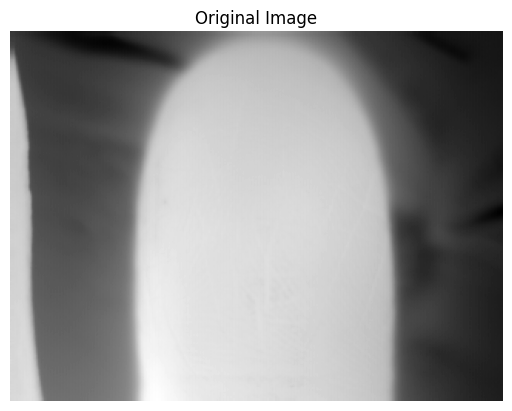

In [134]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os
from scipy.signal import correlate2d
from scipy.stats import pearsonr
import glob

# Загрузка черно-белого изображения
file_path = 'frame_ 510_Ivanova.txt'

# Чтение данных из файла и преобразование в массив numpy
data = np.loadtxt(file_path)
print(data)

# Min-max нормализация
min_value = np.min(data)
max_value = np.max(data)

# Применение формулы нормализации
normalized_data = np.round( ((data - min_value) / (max_value - min_value)) * 255 )
normalized_data = normalized_data.astype(np.uint8)

# Преобразование одномерного массива в изображение (если необходимо)
# Например, если у вас 5 столбцов, вы можете указать количество строк
# В данном случае мы просто используем shape, чтобы получить исходное изображение
image = normalized_data.reshape((normalized_data.shape[0], normalized_data.shape[1]))

plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

[[297.456 297.55  297.545 ... 296.332 296.237 296.332]
 [297.624 297.55  297.545 ... 296.332 296.237 296.332]
 [297.629 297.555 297.55  ... 296.332 296.237 296.332]
 ...
 [303.501 303.506 303.506 ... 296.652 296.577 296.627]
 [303.464 303.524 303.524 ... 296.652 296.582 296.637]
 [303.464 303.524 303.524 ... 296.652 296.582 296.637]]
Среднее значение яркости изображения: 138.74


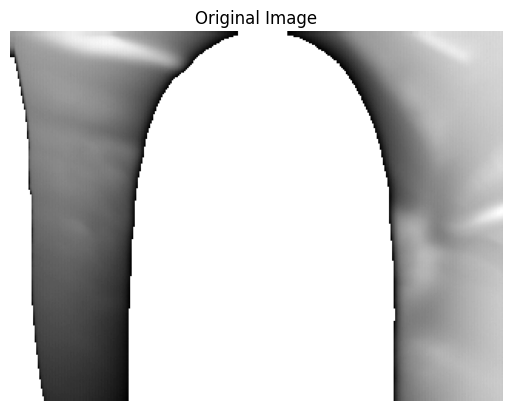

0
0
320
240


In [135]:
data = np.loadtxt(file_path)
print(data)

# Min-max нормализация
min_value = np.min(data)
max_value = np.max(data)

# Применение формулы нормализации
normalized_data = np.round( ((data - min_value) / (max_value - min_value)) * 255 )
normalized_data = normalized_data.astype(np.uint8)

# Преобразование одномерного массива в изображение (если необходимо)
# Например, если у вас 5 столбцов, вы можете указать количество строк
# В данном случае мы просто используем shape, чтобы получить исходное изображение
image = normalized_data.reshape((normalized_data.shape[0], normalized_data.shape[1]))

mean_brightness = np.mean(image)

print(f"Среднее значение яркости изображения: {mean_brightness:.2f}")

image_copy = np.where(image > mean_brightness, 0, image)

image_copy = cv2.bitwise_not(image_copy)

plt.title('Original Image')
plt.imshow(image_copy, cmap='gray')
plt.axis('off')
plt.show()
# Применение порогового значения
_, thresh = cv2.threshold(image_copy, 127, 255, cv2.THRESH_BINARY)

# Нахождение контуров
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Получение координат ограничивающего прямоугольника для каждого контура
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

print(x)
print(y)
print(w)
print(h)
    # Здесь вы можете сохранить или использовать координаты (x, y, w, h)

In [136]:
import numpy as np

def create_log_kernel(sigma=1):
    size = int(2 * np.ceil(3 * sigma) + 1)
    x = np.arange(-size//2 + 1, size//2 + 1)
    y = np.arange(-size//2 + 1, size//2 + 1)
    X, Y = np.meshgrid(x, y)
    kernel = (1 - (X**2 + Y**2)/(sigma**2)) * np.exp(-(X**2 + Y**2)/(2 * sigma**2))
    kernel = kernel - kernel.mean()  # Удаление постоянной составляющей
    return kernel

In [137]:
import cv2

gray_image = image_copy
log_kernel = create_log_kernel(sigma=2)
response = cv2.filter2D(gray_image.astype(np.float32), -1, log_kernel)

In [138]:
from scipy.ndimage import maximum_filter

# Поиск локальных максимумов в окрестности 3x3
local_max = maximum_filter(response, size=3) == response
response[~local_max] = 0  # Обнуление всех, кроме максимумов

In [139]:
threshold = 0.3 * response.max()
points = np.argwhere(response >= threshold)

In [140]:
output_image = image_copy.copy()
с1 = 0
for pt in points:
    cv2.circle(output_image, tuple(pt[::-1]), 2, (0, 0, 255), -1)
    с1 += 1

print("Найдено точек на границе:", с1)
cv2.imshow('Detected Points', output_image)
cv2.waitKey(0)

Найдено точек на границе: 231


-1

[[297.456 297.55  297.545 ... 296.332 296.237 296.332]
 [297.624 297.55  297.545 ... 296.332 296.237 296.332]
 [297.629 297.555 297.55  ... 296.332 296.237 296.332]
 ...
 [303.501 303.506 303.506 ... 296.652 296.577 296.627]
 [303.464 303.524 303.524 ... 296.652 296.582 296.637]
 [303.464 303.524 303.524 ... 296.652 296.582 296.637]]


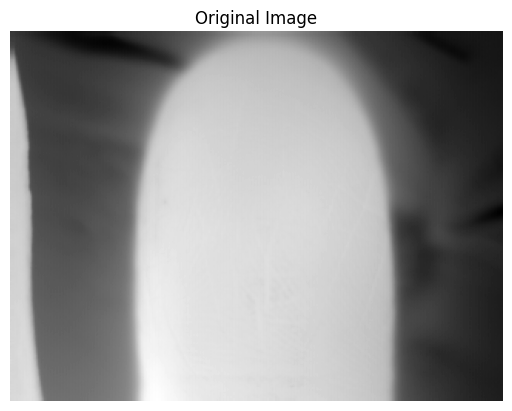

Среднее значение яркости изображения: 116.26


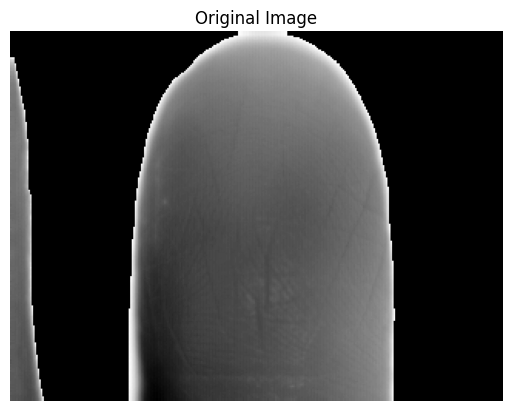

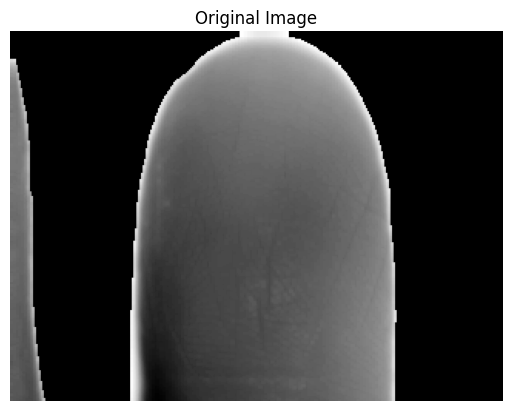

In [141]:
data = np.loadtxt(file_path)
print(data)

# Min-max нормализация
min_value = np.min(data)
max_value = np.max(data)

# Применение формулы нормализации
normalized_data = np.round( ((data - min_value) / (max_value - min_value)) * 255 )
normalized_data = normalized_data.astype(np.uint8)

# Преобразование одномерного массива в изображение (если необходимо)
# Например, если у вас 5 столбцов, вы можете указать количество строк
# В данном случае мы просто используем shape, чтобы получить исходное изображение
image = normalized_data.reshape((normalized_data.shape[0], normalized_data.shape[1]))

plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
# Отображение изображения с помощью OpenCV

image = cv2.bitwise_not(image)

mean_brightness = np.mean(image)

print(f"Среднее значение яркости изображения: {mean_brightness:.2f}")

image = np.where(image > mean_brightness, 0, image)

#image = cv2.bitwise_not(image)

plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Применение размытия для уменьшения шума
#blurred = cv2.GaussianBlur(image, (5, 5), 0)

kernel = np.ones((2, 2), np.uint8)
opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

plt.title('Original Image')
plt.imshow(opened_image, cmap='gray')
plt.axis('off')
plt.show()





Количество найденых пор: 337


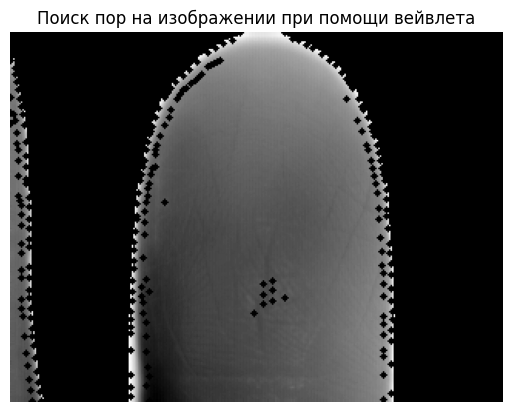

In [142]:
import numpy as np
from scipy.ndimage import maximum_filter
import cv2

image_copy3 = image.copy()

def create_log_kernel(sigma=1):
    size = int(2 * np.ceil(3 * sigma) + 1)
    x = np.arange(-size//2 + 1, size//2 + 1)
    y = np.arange(-size//2 + 1, size//2 + 1)
    X, Y = np.meshgrid(x, y)
    kernel = (1 - (X**2 + Y**2)/(sigma**2)) * np.exp(-(X**2 + Y**2)/(2 * sigma**2))
    kernel = kernel - kernel.mean()  # Удаление постоянной составляющей
    return kernel


gray_image = image_copy3

edges = cv2.Canny(gray_image, threshold1=30, threshold2=100)  # Увеличьте пороги
edges = cv2.dilate(edges, kernel=np.ones((7,7), np.uint8), iterations=2)

log_kernel = create_log_kernel(sigma=2)

response = cv2.filter2D(gray_image.astype(np.float32), -1, log_kernel)

# Поиск локальных максимумов в окрестности 3x3
local_max = maximum_filter(response, size=3) == response
response[~local_max] = 0  # Обнуление всех, кроме максимумов

threshold = 0.05 * response.max()
points = np.argwhere(response >= threshold)


output_image = image.copy()
c2 = 0
for pt in points:
    cv2.circle(output_image, tuple(pt[::-1]), 2, (0, 0, 255), -1)
    c2 += 1

print("Количество найденых пор:",c2)
plt.title('Поиск пор на изображении при помощи вейвлета')
plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.show()

In [143]:

# В 5 раз больше исходного
new_width = 1600  # Новая ширина
new_height = 1200  # Новая высота

sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 8, -1],
                              [0, -1, 0]])

# Применяем свертку
sharpened_image = cv2.filter2D(result_image, -1, sharpening_kernel)

# Растяжение изображения
resized_image = cv2.resize(sharpened_image, (new_width, new_height),interpolation=cv2.INTER_CUBIC)



circles = cv2.HoughCircles(resized_image, cv2.HOUGH_GRADIENT, dp=2, minDist=20,
                           param1= 80, param2=20, minRadius=5, maxRadius=15)

#minDist=2,  param1=30, param2=5, minRadius=0, maxRadius=2 NOT RESIZE



NameError: name 'result_image' is not defined

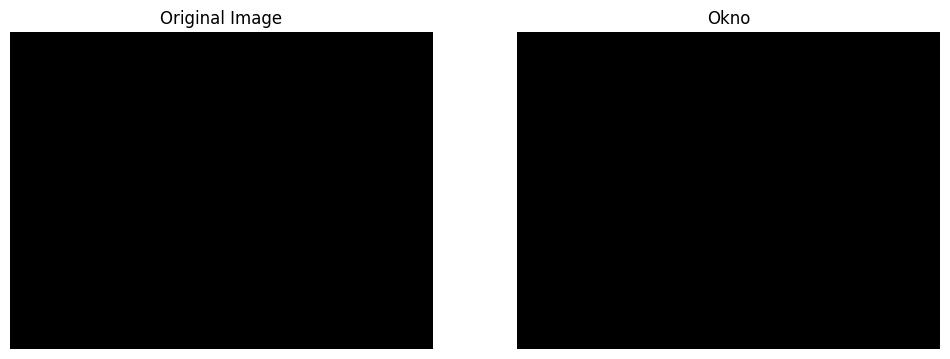

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:

def sliding_window(image, step_size, window_size):
    # Генерация окон с заданным размером и шагом
    for y in range(0, image.shape[0] - window_size[1], step_size):
        for x in range(0, image.shape[1] - window_size[0], step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

# Загрузка изображения
image = resized_image
# Определение размера окна
window_size = (25, 25)  # Ширина и высота окна
# Определение шага
step_size = 25

# Проход по изображению с использованием скользящего окна
#for (x, y, window) in sliding_window(image, step_size, window_size):
    # Здесь можно добавить код для обработки окна, например, классификацию
    # Для примера просто отобразим окно
    #cv2.rectangle(image, (x, y), (x + window_size[0], y + window_size[1]), (0, 255, 0), 2)
    
output_dir = 'output_windows'
os.makedirs(output_dir, exist_ok=True)

brightness_threshold_low = 160
brightness_threshold_high = 180
# Создание копии изображения для отображения результатов
output_image = image.copy()
# Проход по изображению с использованием скользящего окна
window_count = 0
for (x, y, window) in sliding_window(image, step_size, window_size):
    # Вычисление среднего значения яркости окна
    mean_brightness = np.mean(window)
    #print("X - {0} Y - {1} mean_brightness - {2} ".format(x, y, mean_brightness))
    # Если средняя яркость выше порога, рисуем прямоугольник на оригинальном изображении
    if mean_brightness > brightness_threshold_low and mean_brightness < brightness_threshold_high:
        cv2.rectangle(output_image, (x, y), (x + window_size[0], y + window_size[1]), (0, 255, 0), 2)
        print("X - {0} Y - {1} mean_brightness - {2} ".format(x, y, mean_brightness))
        window_filename = os.path.join(output_dir, f'window_{window_count}.png')
        cv2.imwrite(window_filename, window)
        window_count += 1


# Отображение оригинального изображения с выделенными окнами
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Okno')
plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.show()

pattern = cv2.imread('average_pattern.jpg')
pattern = cv2.cvtColor(pattern, cv2.COLOR_BGR2GRAY)  # Преобразуем в оттенки серого
cv2.imshow("Matched Windows", pattern)
cv2.waitKey(0)
cv2.destroyAllWindows()